# Linear Regression

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Function to implement Linear_Regression

In [47]:
def lineargression_run(data, train, test):

    # Xây dựng mô hình Linear Regression cho việc dự báo trước
    model_before = LinearRegression()
    model_before.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

    # Dự báo cho dữ liệu test
    predictions_before = model_before.predict(np.array(test.index).reshape(-1, 1))

    # Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
    model_after = LinearRegression()
    model_after.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

    # Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
    future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
    future_index_30 = np.arange(test.index[-1] + 1, test.index[-1] + 31)
    future_predictions_30 = model_after.predict(np.array(future_index_30).reshape(-1, 1))

    future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
    future_index_60 = np.arange(test.index[-1] + 31, test.index[-1] + 61)
    future_predictions_60 = model_after.predict(np.array(future_index_60).reshape(-1, 1))

    future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
    future_index_90 = np.arange(test.index[-1] + 61, test.index[-1] + 91)
    future_predictions_90 = model_after.predict(np.array(future_index_90).reshape(-1, 1))

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Sale'], label='Actual Sales')
    plt.plot(test['Date'], test['Sale'], label='Test Data')
    plt.plot(test['Date'], predictions_before, label='Predictions', linestyle='-')
    plt.plot(future_dates_30, future_predictions_30, label='Next 30 days', linestyle='-', color='blue')
    plt.plot(future_dates_60, future_predictions_60, label='Next 60 days', linestyle='-', color='yellow')
    plt.plot(future_dates_90, future_predictions_90, label='Next 90 days', linestyle='-', color='red')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    # RMSE
    rmse = np.sqrt(mean_squared_error(test['Sale'], predictions_before))
    print("RMSE:", rmse)

    # MAPE
    mape = np.mean(np.abs((test['Sale'] - predictions_before) / test['Sale'])) * 100
    print("MAPE:", mape)

    # MAE
    mae = mean_absolute_error(test['Sale'], predictions_before)
    print("MAE:", mae)


EUR_VND

In [48]:
# Đọc dữ liệu
data = pd.read_csv('EUR.csv') 
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Sale'] = data['Sale'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian
data = data.sort_values(by='Date')
data.drop(['Purchase', 'Transfer'], axis=1, inplace=True)

7:3 EUR

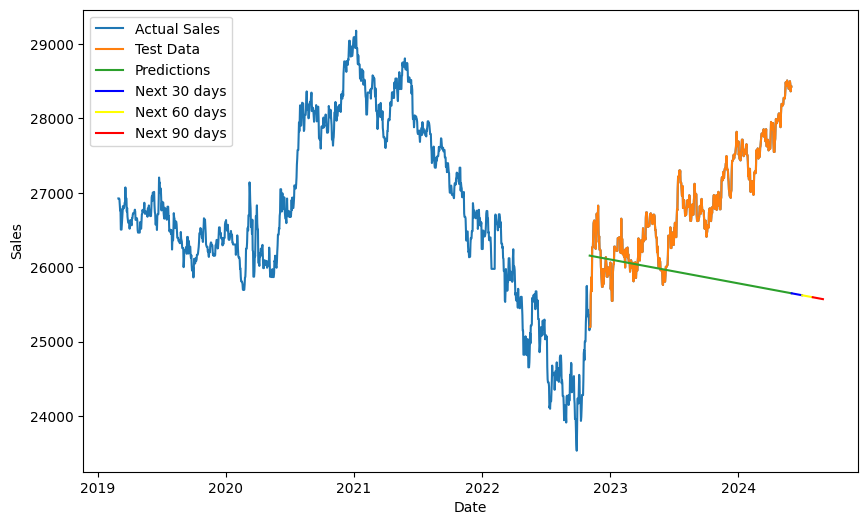

RMSE: 1261.17010198811
MAPE: 3.63179303858631
MAE: 993.698080974227


In [49]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n = len(data)
train_size = int(0.7 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

8:2 EUR

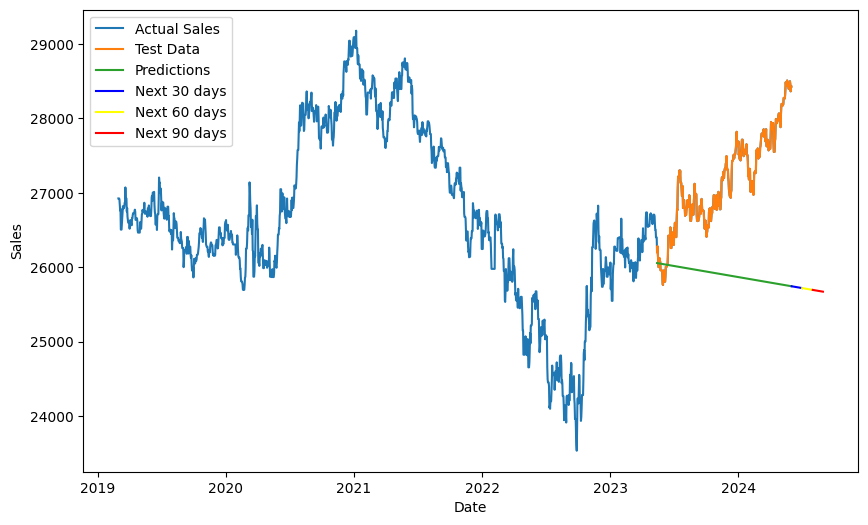

RMSE: 1447.7163478347243
MAPE: 4.60988889744213
MAE: 1267.462128273692


In [50]:
# Chia dữ liệu thành 8 phần train và 2 phần test
n = len(data)
train_size = int(0.8 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

9:1 EUR

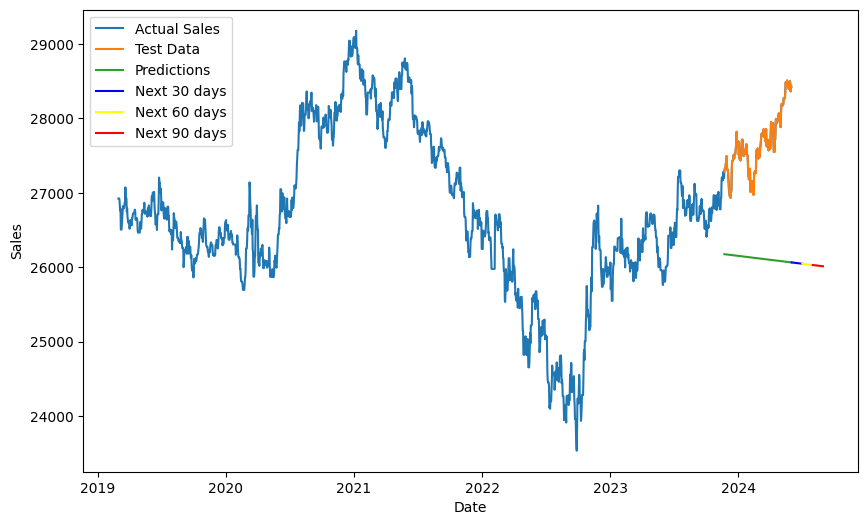

RMSE: 1604.4733753134785
MAPE: 5.581327568802124
MAE: 1549.851991543502


In [51]:
# Chia dữ liệu thành 9 phần train và 1 phần test
n = len(data)
train_size = int(0.9 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

GBP_VND

In [52]:
# Đọc dữ liệu mới
data_1 = pd.read_csv('GBP.csv') 
data_1['Date'] = pd.to_datetime(data_1['Date'], format='%d/%m/%Y')
data_1['Sale'] = data_1['Sale'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian
data_1 = data_1.sort_values(by='Date')
data_1.drop(['Purchase', 'Transfer'], axis=1, inplace=True)

7:3 GBP

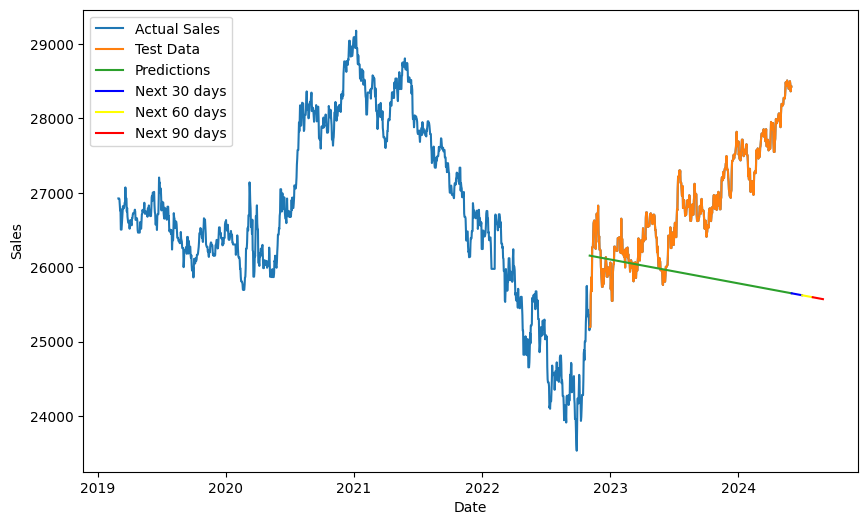

RMSE: 1261.17010198811
MAPE: 3.63179303858631
MAE: 993.698080974227


In [53]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n = len(data)
train_size = int(0.7 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

8:2 GBP

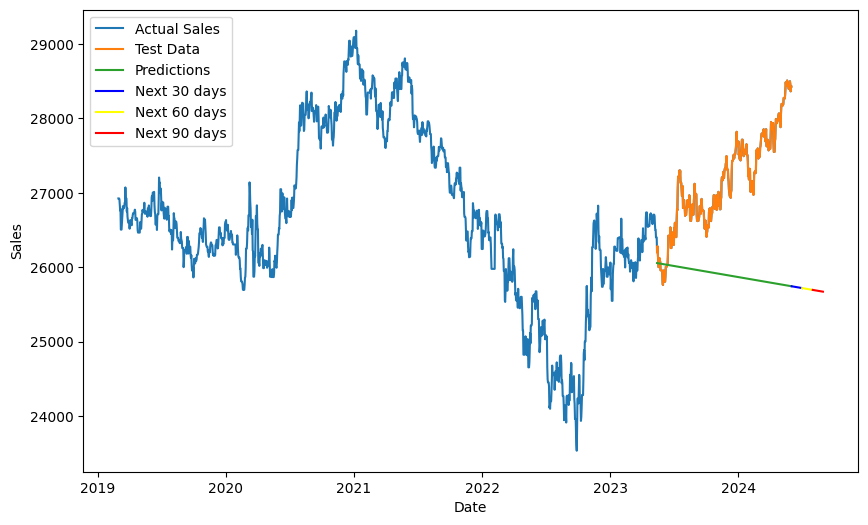

RMSE: 1447.7163478347243
MAPE: 4.60988889744213
MAE: 1267.462128273692


In [54]:
# Chia dữ liệu thành 8 phần train và 2 phần test
n = len(data)
train_size = int(0.8 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

9:1 GBP

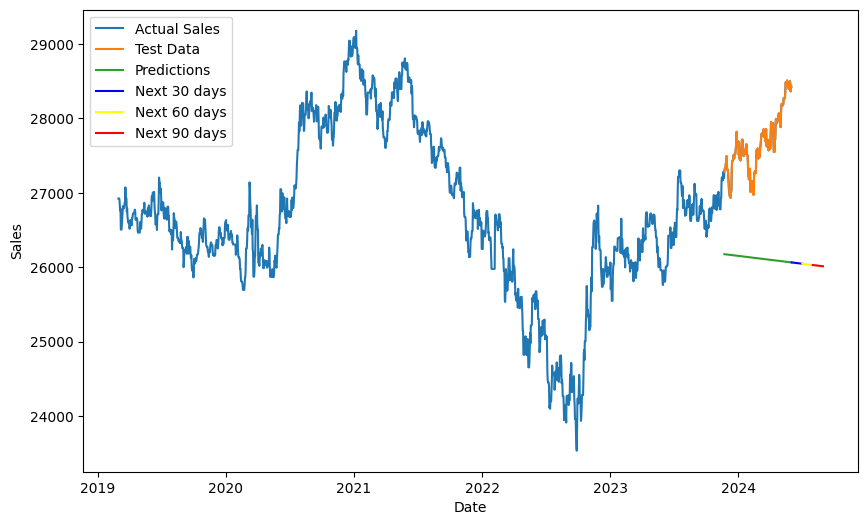

RMSE: 1604.4733753134785
MAPE: 5.581327568802124
MAE: 1549.851991543502


In [55]:
# Chia dữ liệu thành 9 phần train và 1 phần test
n = len(data)
train_size = int(0.9 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

JPY_VND

In [56]:
# Đọc dữ liệu mới
data_2 = pd.read_csv('JPY.csv') 
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%d/%m/%Y')
# data_2['Sale'] = data_2['Sale'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian
data_2 = data_2.sort_values(by='Date')
data_2.drop(['Purchase', 'Transfer'], axis=1, inplace=True)

7:3 JPY

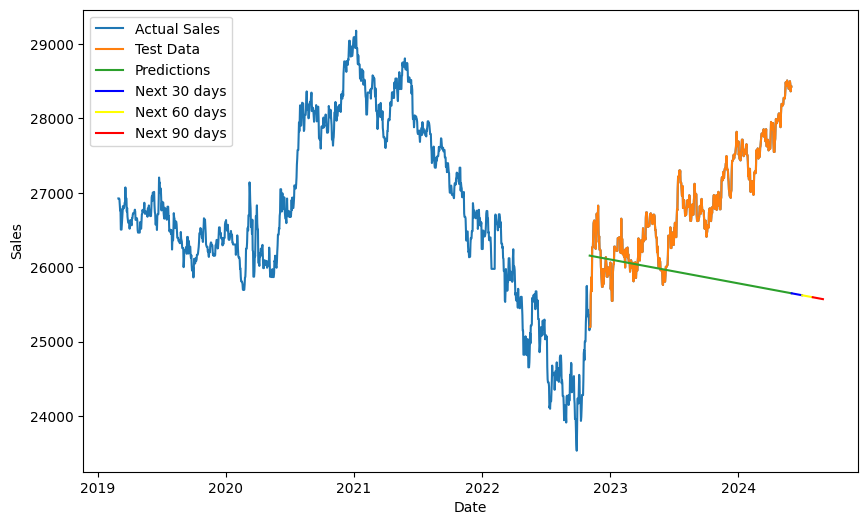

RMSE: 1261.17010198811
MAPE: 3.63179303858631
MAE: 993.698080974227


In [57]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n = len(data)
train_size = int(0.7 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

8:2 JPY

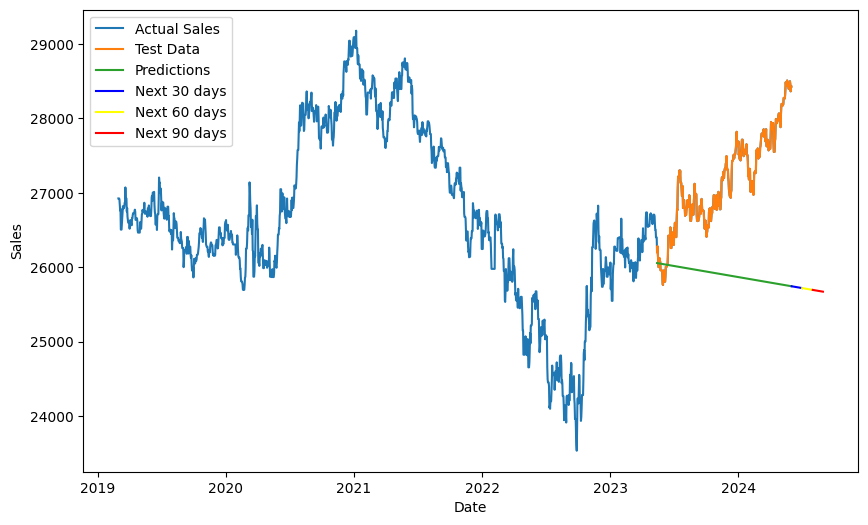

RMSE: 1447.7163478347243
MAPE: 4.60988889744213
MAE: 1267.462128273692


In [58]:
# Chia dữ liệu thành 8 phần train và 2 phần test
n = len(data)
train_size = int(0.8 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)

9:1 JPY

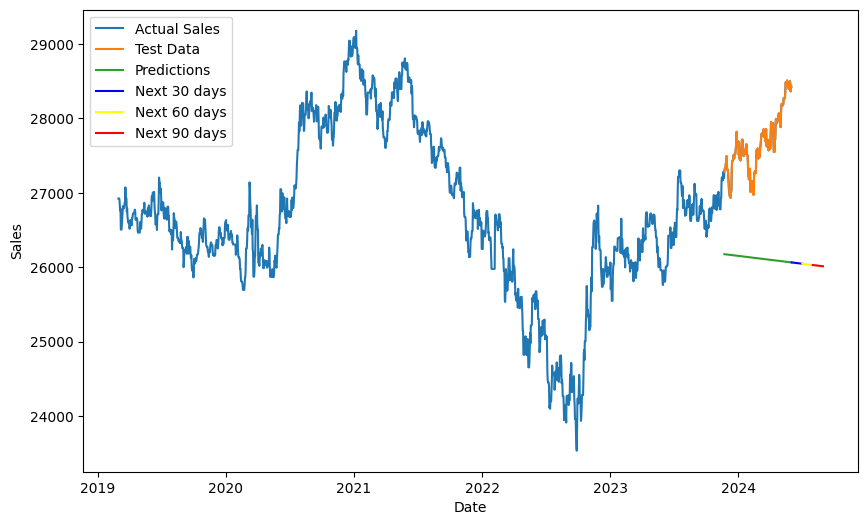

RMSE: 1604.4733753134785
MAPE: 5.581327568802124
MAE: 1549.851991543502


In [59]:
# Chia dữ liệu thành 9 phần train và 1 phần test
n = len(data)
train_size = int(0.9 * n)
train = data[:train_size]
test = data[train_size:]

lineargression_run(data,train,test)